# Problem Statement

According to Millionacres' Home Buyer & Seller Survey, 52% of homeowners have concerns about selling their homes pedominantly due to high uncertainty with regards to property valuation. As a data scientist for a property technology company, a model is to be built to conduct higher accuracy valuation and optimise the price listing found on the company's real estate portal.

This model will be trained on historical transactions in Ames property market, and in the process of building this model, synthesize and highlight the best features that brings the most value to their home and provide the to allow the company's clientle to make more informed decisions.

In [43]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [44]:
#load the data
housing = pd.read_csv('../project_2/datasets/train.csv')

In [45]:
housing.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [47]:
test = pd.read_csv('../project_2/datasets/test.csv')

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

<b>observation</b>: Test data does not have SalePrice column

<b>action</b>: Test data will be cleaned in tandem with Housing data

In [49]:
#change the column headers
housing.columns = housing.columns.str.lower()
housing.columns = housing.columns.str.replace(' ','_')
test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ','_')

In [50]:
# set y target
y_target = housing['saleprice']

In [51]:
y_target

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: saleprice, Length: 2051, dtype: int64

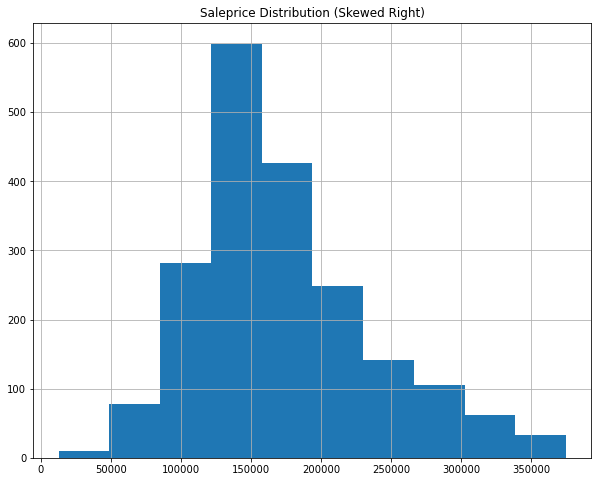

In [74]:
#look for anomolies in y_target
plt.figure(figsize=(10,8))
plt.title('Saleprice Distribution (Skewed Right)');
y_target.hist();
plt.savefig(fname='../project_2/images/y_target_hist.png');


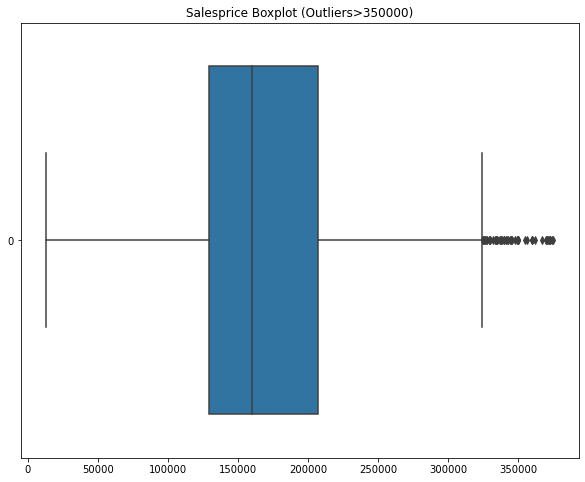

In [73]:
plt.figure(figsize=(10,8))
plt.title('Salesprice Boxplot (Outliers>350000)');
sns.boxplot(data=y_target, orient = 'h' );
plt.savefig(fname='../project_2/images/y_target_boxplot.png');

<b>observation</b>: Many outliers exist after 375000, causing the data to be skewed. These data will be removed from the dataset

In [54]:
#removing outliers from dfs

outlier_index = housing[housing.saleprice > 375_000].index.to_list()

housing.drop(housing.index[outlier_index],inplace=True)
housing.reset_index(drop=True,inplace=True)

y_target.drop(y_target.index[outlier_index],inplace=True)
y_target.reset_index(drop=True,inplace=True)


In [55]:
housing.shape

(1987, 81)

In [56]:
y_target.shape

(1987,)

In [57]:
#Separate dataframe

# group the numerical data

numerical_df = housing.select_dtypes(include=np.number)

#group no numerical data

categorical_df = housing.select_dtypes(exclude=np.number)

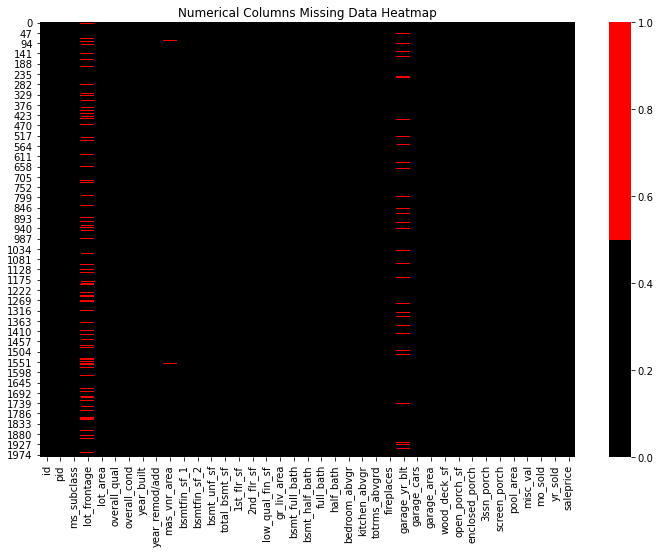

In [59]:
#visualing missing data
plt.figure(figsize=(12,8))
plt.title('Numerical Columns Missing Data Heatmap')
sns.heatmap(numerical_df.isnull(), cmap=['#000000','#FF0000']);
plt.savefig(fname='../project_2/images/missing_num_heatmap.png');

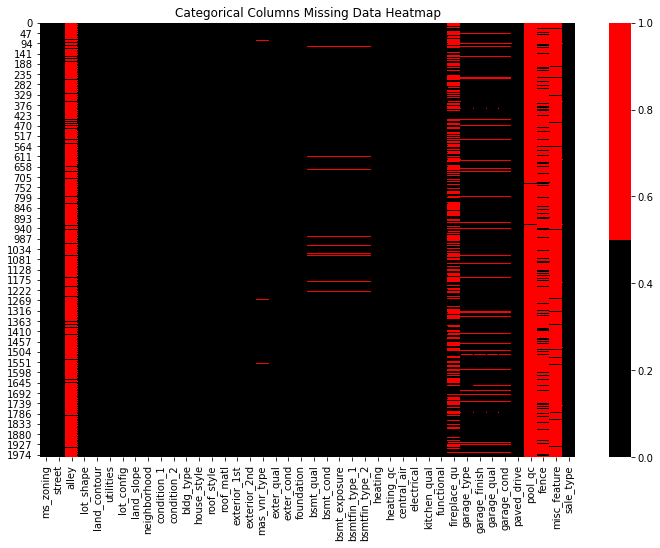

In [60]:
#visualing missing data
plt.figure(figsize=(12,8))
plt.title('Categorical Columns Missing Data Heatmap')
sns.heatmap(categorical_df.isnull(), cmap=['#000000','#FF0000']);
plt.savefig(fname='../project_2/images/missing_cat_heatmap.png');

In [18]:
#identifying columns with more than 20% missing data in both dfs

col_to_drop = [col for col in housing.columns if (housing[col].isnull().sum()/len(housing[col]))>0.2]

col_to_drop


['alley', 'fireplace_qu', 'pool_qc', 'fence', 'misc_feature']

In [19]:
#drop columns with more than 20% missing data from both dfs

housing.drop(columns=col_to_drop,inplace=True)
test.drop(columns=col_to_drop,inplace=True)

<b>action</b>: features with more than 20% missing data have been dropped in both Test and Housing data

In [20]:
#identifying unessary data
#categorical data repeated with high percentage of one category result, condition > 80%

unnecessary_col = []

for col in categorical_df.columns:
    #calculate percentage of most frequent category
    pct = categorical_df[col].value_counts().iloc[0]/len(categorical_df[col])
    if pct > 0.80:
        unnecessary_col.append(col)
        print(f'{col} : {pct}')
        print('\n')

street : 0.9964771011575239


land_contour : 0.9043784599899346


utilities : 0.9989934574735783


land_slope : 0.953195772521389


condition_1 : 0.8610971313537997


condition_2 : 0.9889280322093609


bldg_type : 0.8238550578761953


roof_style : 0.8052340211373931


roof_matl : 0.9879214896829391


exter_cond : 0.8641167589330649


bsmt_cond : 0.8928032209360846


bsmtfin_type_2 : 0.8500251635631605


heating : 0.9833920483140413


central_air : 0.9290387518872673


electrical : 0.9079013588324106


functional : 0.9320583794665325


garage_qual : 0.8912934071464519


garage_cond : 0.9079013588324106


paved_drive : 0.9043784599899346


sale_type : 0.8787116255661802




In [21]:
#drop unecessary columns from both dfs

housing.drop(columns=unnecessary_col,inplace=True)
test.drop(columns=unnecessary_col,inplace=True)

In [22]:
test.shape

(878, 55)

In [23]:
housing.shape

(1987, 56)

<b>action</b>: features with mode data points greater than 80% are dropped as they provide little information and its coefficient would affect our model.

In [24]:
#look for duplicate entries
dup_val = housing.pivot_table(index = ['id','saleprice'],aggfunc='size')
dup_val[dup_val>1]

Series([], dtype: int64)

<b>observation</b>: No duplicate values in dataset

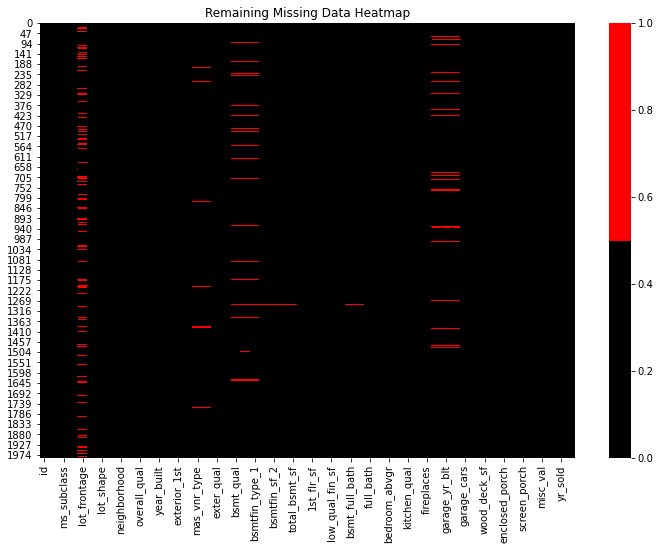

In [25]:
#visualing missing data
plt.figure(figsize=(12,8))
plt.title('Remaining Missing Data Heatmap')
sns.heatmap(housing.isnull(), cmap=['#000000','#FF0000']);

In [26]:
missing = pd.DataFrame(data = {'df_column':housing.columns,'number_of_missing':housing.isnull().sum()})
missing.reset_index(drop=True,inplace=True)

In [27]:
missing[missing.number_of_missing>0].sort_values(by = 'number_of_missing',ascending=False)

,df_column,number_of_missing
4,lot_frontage,328
43,garage_finish,114
42,garage_yr_blt,114
41,garage_type,113
21,bsmt_exposure,58
20,bsmt_qual,55
22,bsmtfin_type_1,55
17,mas_vnr_area,21
16,mas_vnr_type,21
32,bsmt_full_bath,2


<b>observation</b>: Top 7 columns to drop due to missing data, other missing data will be removed by rows

In [28]:
col_to_drop = missing[missing.number_of_missing>0].sort_values(by = 'number_of_missing',ascending=False)['df_column'].head(7)

In [29]:
col_to_drop

4       lot_frontage
43     garage_finish
42     garage_yr_blt
41       garage_type
21     bsmt_exposure
20         bsmt_qual
22    bsmtfin_type_1
Name: df_column, dtype: object

In [30]:
#drop top 7 columns with missing data

housing.drop(columns=col_to_drop,inplace=True)
test.drop(columns=col_to_drop,inplace=True)

In [31]:
remaining_cat = missing.drop(index = col_to_drop.index)

In [32]:
remaining_cat[remaining_cat.number_of_missing > 0]

,df_column,number_of_missing
16,mas_vnr_type,21
17,mas_vnr_area,21
23,bsmtfin_sf_1,1
24,bsmtfin_sf_2,1
25,bsmt_unf_sf,1
26,total_bsmt_sf,1
32,bsmt_full_bath,2
33,bsmt_half_bath,2
44,garage_cars,1
45,garage_area,1


In [33]:
remaining_cat = remaining_cat[remaining_cat.number_of_missing > 0]
remaining_cat.df_column

16      mas_vnr_type
17      mas_vnr_area
23      bsmtfin_sf_1
24      bsmtfin_sf_2
25       bsmt_unf_sf
26     total_bsmt_sf
32    bsmt_full_bath
33    bsmt_half_bath
44       garage_cars
45       garage_area
Name: df_column, dtype: object

In [34]:
housing.dropna(axis=0,inplace=True)

<b> action </b>: Impute remaining categorical data that are not nominal

In [35]:
#group non numerical data

categorical_df = housing.select_dtypes(exclude=np.number)

In [36]:
sorted(categorical_df.columns)

['exter_qual',
 'exterior_1st',
 'exterior_2nd',
 'foundation',
 'heating_qc',
 'house_style',
 'kitchen_qual',
 'lot_config',
 'lot_shape',
 'mas_vnr_type',
 'ms_zoning',
 'neighborhood']

In [37]:
#change ordinal data into nominal scale in dfs

ordinal_col = ['lot_shape','exter_qual','kitchen_qual','heating_qc']

scale_mapper = {'lot_shape':{'Reg':4,'IR1':3,'IR2':2,'IR3':1},
                'exter_qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                'kitchen_qual':{'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,'Na':1},
                'heating_qc':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}}
 

In [38]:
for x in ordinal_col:
    housing[x] = housing[x].replace(scale_mapper[x])

for x in ordinal_col:
    test[x] = test[x].replace(scale_mapper[x])

In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1986
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1963 non-null   int64  
 1   pid              1963 non-null   int64  
 2   ms_subclass      1963 non-null   int64  
 3   ms_zoning        1963 non-null   object 
 4   lot_area         1963 non-null   int64  
 5   lot_shape        1963 non-null   int64  
 6   lot_config       1963 non-null   object 
 7   neighborhood     1963 non-null   object 
 8   house_style      1963 non-null   object 
 9   overall_qual     1963 non-null   int64  
 10  overall_cond     1963 non-null   int64  
 11  year_built       1963 non-null   int64  
 12  year_remod/add   1963 non-null   int64  
 13  exterior_1st     1963 non-null   object 
 14  exterior_2nd     1963 non-null   object 
 15  mas_vnr_type     1963 non-null   object 
 16  mas_vnr_area     1963 non-null   float64
 17  exter_qual    

In [40]:
#export dfs
housing.to_csv('/Users/AdelAlsagoff/DSI/materials copy/project_2/datasets/cleaned_train.csv', index = False)


test.to_csv('/Users/AdelAlsagoff/DSI/materials copy/project_2/datasets/cleaned_test.csv', index = False)
